## Intro

* Plik z danymi - "olympics_homework.csv"
* Wykonaj zadania z tego notebooka

1. Wczytaj dane z pliku .csv
2. Stwórz nową df odrzucając ostatni wiersz z main_df - w dalszej pracy korzystaj z nowej df
3. Wykonaj histogram pokazujący jak rozkłada się ilość medali 
4. Wypisz dane państw, które zdobyły więcej złotych medali w igrzyskach zimowych niż w letnich
5. Wypisz dane państw, które zdobyły łącznie więcej niż 250 medali w igrzyskach letnich
6. Dodaj nową kolumnę 'Efficiency', która pokazuje wydajność państwa w zdobywaniu medali - tzn. stosunek całkowitej ilości zdobytych medali do ilości występów, a następnie posortuj df według tej kolumny malejąco
7. Wybierz losowo 5 państw i wykonaj barplot przedstawiający ilości zdobytych przez nie medali (osobno złotych, srebrnych, brązowych) na igrzyskach letnich

## Zadania

In [79]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline
plt.style.use('seaborn-poster')

main_df = pd.read_csv("data/olympics_homework.csv")
df = main_df.drop(main_df.index[-1])
df

,Country,NrSummerGames,SummerGold,SummerSilver,SummerBronze,SummerTotal,NrWinterGames,WinterGold,WinterSilver,WinterBronze,WinterTotal,NrTotalGames,TotalGold,TotalSilver,TotalBronze,CombinedTotal
0,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Yugoslavia (YUG) [YUG],16,26,29,28,83,14,0,3,1,4,30,26,32,29,87
142,Independent Olympic Participants (IOP) [IOP],1,0,1,2,3,0,0,0,0,0,1,0,1,2,3
143,Zambia (ZAM) [ZAM],12,0,1,1,2,0,0,0,0,0,12,0,1,1,2
144,Zimbabwe (ZIM) [ZIM],12,3,4,1,8,1,0,0,0,0,13,3,4,1,8


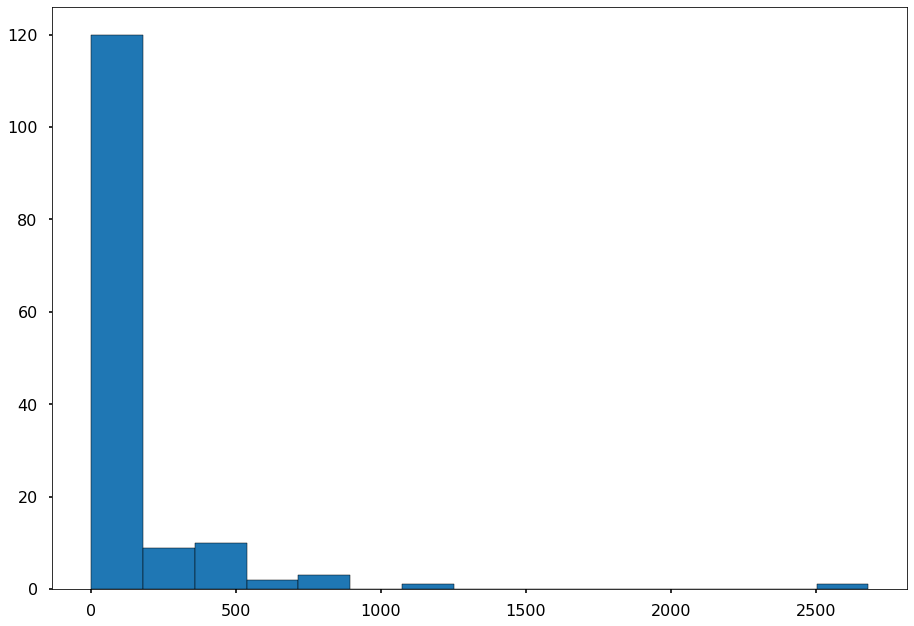

In [80]:
plt.hist(df["CombinedTotal"], bins=15, edgecolor="black")
plt.tight_layout()
plt.show()

In [81]:
# 4. Wypisz dane państw, które zdobyły więcej złotych medali w igrzyskach zimowych niż w letnich
filt = df["WinterGold"].gt(df["SummerGold"])
df[filt]

,Country,NrSummerGames,SummerGold,SummerSilver,SummerBronze,SummerTotal,NrWinterGames,WinterGold,WinterSilver,WinterBronze,WinterTotal,NrTotalGames,TotalGold,TotalSilver,TotalBronze,CombinedTotal
6,Austria (AUT),26,18,33,35,86,22,59,78,81,218,48,77,111,116,304
21,Canada (CAN),25,59,99,121,279,22,62,56,52,170,47,121,155,173,449
75,Liechtenstein (LIE),16,0,0,0,0,18,2,2,5,9,34,2,2,5,9
93,Norway (NOR) [Q],24,56,49,43,148,22,118,111,100,329,46,174,160,143,477
121,Switzerland (SUI),27,47,73,65,185,22,50,40,48,138,49,97,113,113,323


In [82]:
# 5. Wypisz dane państw, które zdobyły łącznie więcej niż 250 medali w igrzyskach letnich
filt = df["SummerTotal"].gt(250)
df[filt]

,Country,NrSummerGames,SummerGold,SummerSilver,SummerBronze,SummerTotal,NrWinterGames,WinterGold,WinterSilver,WinterBronze,WinterTotal,NrTotalGames,TotalGold,TotalSilver,TotalBronze,CombinedTotal
5,Australia (AUS) [AUS] [Z],25,139,152,177,468,18,5,3,4,12,43,144,155,181,480
21,Canada (CAN),25,59,99,121,279,22,62,56,52,170,47,121,155,173,449
23,China (CHN) [CHN],9,201,146,126,473,10,12,22,19,53,19,213,168,145,526
40,Finland (FIN),24,101,84,117,302,22,42,62,57,161,46,143,146,174,463
41,France (FRA) [O] [P] [Z],27,202,223,246,671,22,31,31,47,109,49,233,254,293,780
44,Germany (GER) [GER] [Z],15,174,182,217,573,11,78,78,53,209,26,252,260,270,782
46,East Germany (GDR) [GDR],5,153,129,127,409,6,39,36,35,110,11,192,165,162,519
49,Great Britain (GBR) [GBR] [Z],27,236,272,272,780,22,10,4,12,26,49,246,276,284,806
56,Hungary (HUN),25,167,144,165,476,22,0,2,4,6,47,167,146,169,482
64,Italy (ITA) [M] [S],26,198,166,185,549,22,37,34,43,114,48,235,200,228,663


In [84]:
# 6. Dodaj nową kolumnę 'Efficiency', która pokazuje wydajność państwa w zdobywaniu medali - tzn. stosunek całkowitej ilości zdobytych medali do ilości występów, a następnie posortuj df według tej kolumny malejąco
df["Efficiency"] = df["CombinedTotal"] / df["NrTotalGames"]
df.sort_values(by=["Efficiency"], ascending=False)


,Country,NrSummerGames,SummerGold,SummerSilver,SummerBronze,SummerTotal,NrWinterGames,WinterGold,WinterSilver,WinterBronze,WinterTotal,NrTotalGames,TotalGold,TotalSilver,TotalBronze,CombinedTotal,Efficiency
107,Unified Team (EUN) [EUN],1,45,38,29,112,1,9,6,8,23,2,54,44,37,135,67.500000
106,Soviet Union (URS) [URS],9,395,319,296,1010,9,78,57,59,194,18,473,376,355,1204,66.888889
135,United States (USA) [P] [Q] [R] [Z],26,976,757,666,2399,22,96,102,84,282,48,1072,859,750,2681,55.854167
104,Russia (RUS) [RUS],5,132,121,142,395,6,49,40,35,124,11,181,161,177,519,47.181818
46,East Germany (GDR) [GDR],5,153,129,127,409,6,39,36,35,110,11,192,165,162,519,47.181818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,Guyana (GUY) [GUY],16,0,0,1,1,0,0,0,0,0,16,0,0,1,1,0.062500
109,Senegal (SEN),13,0,1,0,1,5,0,0,0,0,18,0,1,0,1,0.055556
140,Virgin Islands (ISV),11,0,1,0,1,7,0,0,0,0,18,0,1,0,1,0.055556
29,Cyprus (CYP),9,0,1,0,1,10,0,0,0,0,19,0,1,0,1,0.052632


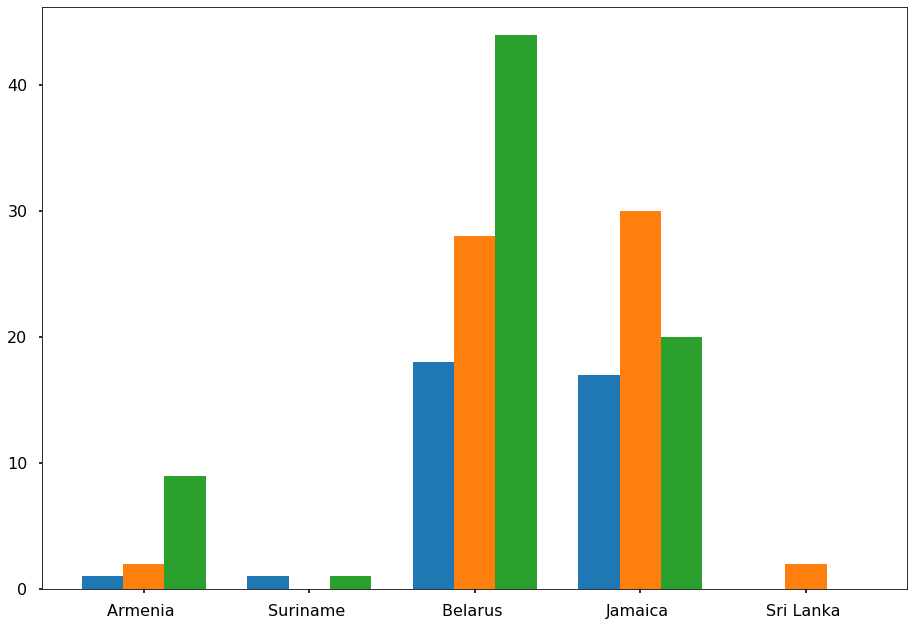

In [140]:
# 7. Wybierz losowo 5 państw i wykonaj barplot przedstawiający ilości zdobytych przez nie medali (osobno złotych, srebrnych, brązowych) na igrzyskach letnich
sample = df.sample(n=5)

to_plot = ["TotalGold", "TotalSilver", "TotalBronze"]
width = 1/(len(to_plot)+1)

x = np.arange(len(sample))

xt = sample["Country"].str.extract(r"(.*)\(")[0]
plt.xticks(x + width*(len(to_plot)-1)/2, xt)

for y in [sample[column] for column in to_plot]:
    plt.bar(x, y, width)
    x = x + width

plt.tight_layout()
plt.show()